In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**1.DATA DISCOVERY**

In [5]:
file_wecode = pd.read_csv("/content/drive/MyDrive/21-5-2021/wecode.csv")

In [6]:
file_wecode

,id,assignment_id,problem_id,user_id,is_final,status,pre_score,coefficient,file_name,language_id,created_at,updated_at
0,4,0,3,4,1,SCORE,10000,100,solution-0,2,2020-10-30 10:58:11,2020-10-30 10:58:19
1,5,0,4,4,1,SCORE,10000,100,solution-1,2,2020-10-30 11:07:09,2020-10-30 11:07:17
2,6,0,5,4,0,Compilation Error,0,100,solution-2,2,2020-10-30 11:08:01,2020-10-30 11:23:36
3,7,0,5,4,0,Compilation Error,0,100,solution-3,2,2020-10-30 11:11:41,2020-10-30 11:11:42
4,8,0,5,4,0,Compilation Error,0,100,solution-4,2,2020-10-30 11:15:06,2020-10-30 11:15:07
...,...,...,...,...,...,...,...,...,...,...,...,...
264601,266667,0,25,1796,0,SCORE,0,100,solution-3977,4,2021-04-28 09:34:20,2021-04-28 09:34:27
264602,266668,0,25,1796,0,Compilation Error,0,100,solution-3978,2,2021-04-28 09:35:07,2021-04-28 09:35:08
264603,266669,0,25,1796,1,SCORE,10000,100,solution-3979,4,2021-04-28 09:35:15,2021-04-28 09:35:21
264604,266670,0,150,255,1,SCORE,6250,100,solution-3980,2,2021-05-11 01:34:57,2021-05-11 01:35:28


In [7]:
file_wecode2 = file_wecode[['user_id', 'assignment_id', 'problem_id', 'pre_score', 'is_final']]

def Solved(file_wecode2):
  if (file_wecode2['is_final'] == 1) and (file_wecode2['pre_score'] == 10000):
    return 1
  else:
    return 0

file_wecode2['solved'] = file_wecode2.apply(Solved, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [8]:
file_wecode2

,user_id,assignment_id,problem_id,pre_score,is_final,solved
0,4,0,3,10000,1,1
1,4,0,4,10000,1,1
2,4,0,5,0,0,0
3,4,0,5,0,0,0
4,4,0,5,0,0,0
...,...,...,...,...,...,...
264601,1796,0,25,0,0,0
264602,1796,0,25,0,0,0
264603,1796,0,25,10000,1,1
264604,255,0,150,6250,1,0


In [9]:
grouped_by = file_wecode2.groupby(["user_id"])

n1 = grouped_by['assignment_id'].nunique() # Số assignment đã làm

n2 = grouped_by['problem_id'].nunique() # Số problem đã làm

n3 = grouped_by['problem_id'].count() # Số lần submit

temp1 = file_wecode2[file_wecode2['solved']==1][['user_id', 'solved']] # Số problem đã solve
temp1 = temp1.groupby('user_id').sum() 

temp2 = file_wecode2[file_wecode2['pre_score']==10000][['user_id', 'pre_score']] # Số điểm pre_score (%đúng ab,cd*100%)
temp2 = temp2.groupby('user_id').count()

temp3 = file_wecode2[file_wecode2['is_final'] == 1][['user_id', 'pre_score']] # Tổng pre_score is_final = 1
temp3 = temp3.groupby('user_id').sum()

In [10]:
col={}
data_wecode = pd.DataFrame(col)

data_wecode['assigns'] = n1
data_wecode['probs'] = n2
data_wecode['solved'] = temp1['solved']
data_wecode['subs'] = n3
data_wecode['pre_score'] = temp2['pre_score']
data_wecode['WECODE_score'] = temp3['pre_score']

data_wecode.reset_index(inplace=True)

data_wecode.dropna(axis=0, inplace=True)

num_assignments = file_wecode2['assignment_id'].nunique()
num_problems = file_wecode2['problem_id'].nunique()
num_submissions = len(file_wecode2)

data_wecode['% assigns/all'] = data_wecode['assigns'] / num_assignments
data_wecode['% probs/all'] = data_wecode['probs'] / num_problems
data_wecode['% solved/all'] = data_wecode['solved'] / num_problems
data_wecode['% subs/all'] = data_wecode['subs'] / num_submissions
data_wecode['% solved/probs'] = data_wecode['solved'] / data_wecode['probs']
data_wecode['% pre_score/subs'] = data_wecode['pre_score'] / data_wecode['subs']

print('Number of Assigments:', num_assignments)
print('Number of Problems:', num_problems)
print('Number of Submissions:', num_submissions)

Number of Assigments: 290
Number of Problems: 634
Number of Submissions: 264606


In [11]:
data_wecode

,user_id,assigns,probs,solved,subs,pre_score,WECODE_score,% assigns/all,% probs/all,% solved/all,% subs/all,% solved/probs,% pre_score/subs
0,1,1,2,1.0,2,1.0,10000.0,0.003448,0.003155,0.001577,0.000008,0.500000,0.500000
1,4,1,41,37.0,54,44.0,370000.0,0.003448,0.064669,0.058360,0.000204,0.902439,0.814815
2,5,4,5,3.0,6,3.0,30000.0,0.013793,0.007886,0.004732,0.000023,0.600000,0.500000
3,6,4,88,85.0,130,89.0,850000.0,0.013793,0.138801,0.134069,0.000491,0.965909,0.684615
5,11,10,18,9.0,50,19.0,100316.0,0.034483,0.028391,0.014196,0.000189,0.500000,0.380000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1154,1860,10,43,28.0,76,29.0,329665.0,0.034483,0.067823,0.044164,0.000287,0.651163,0.381579
1155,1862,2,6,4.0,12,4.0,40000.0,0.006897,0.009464,0.006309,0.000045,0.666667,0.333333
1156,1864,5,63,28.0,187,30.0,439741.0,0.017241,0.099369,0.044164,0.000707,0.444444,0.160428
1157,1865,3,17,10.0,99,10.0,116428.0,0.010345,0.026814,0.015773,0.000374,0.588235,0.101010


In [17]:
file_score = pd.read_csv("/content/drive/MyDrive/21-5-2021/score_training.csv")

In [18]:
file_score

,id,QT,GK,TH,CK,TBM,TBTL
0,22,10,9,8.5,8.5,8.8,8.52
1,24,10,8,10,9.5,9.4,8.41
2,27,10,10,10,10,10,8.67
3,28,10,9.5,7.5,9.5,9.2,7.39
4,29,10,9.5,5,8.5,8.2,8.05
...,...,...,...,...,...,...,...
970,1857,5,4.5,10,4,6,6.03
971,1859,8,5,10,1.5,5.4,5.06
972,1862,5,6.5,1,7.5,5.1,4.71
973,1865,6.5,,3,7.5,,6.89


In [23]:
file_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      975 non-null    int64 
 1   QT      973 non-null    object
 2   GK      974 non-null    object
 3   TH      974 non-null    object
 4   CK      974 non-null    object
 5   TBM     974 non-null    object
 6   TBTL    974 non-null    object
dtypes: int64(1), object(6)
memory usage: 53.4+ KB


In [42]:
score_training_data_new = file_score[['id', 'CK']]
# Thay header cho trùng với dữ liệu wecode
score_training_data_new.columns = ['user_id', 'CK']
# Thay đổi từ Object sang Numberic
score_training_data_new['CK'] = score_training_data_new['CK'].apply(pd.to_numeric, errors='coerce')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [43]:
# Tạo 2 dataframe mới từ bộ dữ liệu điểm CK bị thiếu
score_train = score_training_data_new.dropna(how='any')
score_predict = score_training_data_new[score_training_data_new.isna().any(axis=1)]

# Thay giá trị index chạy từ 0
score_train = score_train.reset_index()
score_train = score_train.drop(columns=['index'])
score_predict = score_predict.reset_index()
score_predict = score_predict.drop(columns=['index'])

In [50]:
score_train.head(10)

,user_id,CK
0,22,8.5
1,24,9.5
2,27,10.0
3,28,9.5
4,29,8.5
5,30,9.0
6,34,6.5
7,35,4.5
8,36,7.0
9,37,7.5


In [51]:
score_predict.head(10)

,user_id,CK
0,51,NaN
1,240,NaN
2,391,NaN
3,513,NaN
4,586,NaN
5,705,NaN
6,750,NaN
7,772,NaN
8,774,NaN
9,776,NaN


In [70]:
data_train = pd.merge(data_wecode, score_train, on='user_id', how='inner')
data_predict = pd.merge(data_wecode, score_predict, on='user_id', how='inner')

In [53]:
#data_train = data[data['% solved/probs'] <= 1]

In [71]:
data_train

,user_id,assigns,probs,solved,subs,pre_score,WECODE_score,% assigns/all,% probs/all,% solved/all,% subs/all,% solved/probs,% pre_score/subs,CK
0,24,15,78,72.0,164,80.0,750299.0,0.051724,0.123028,0.113565,0.000620,0.923077,0.487805,9.5
1,27,2,5,3.0,13,4.0,39000.0,0.006897,0.007886,0.004732,0.000049,0.600000,0.307692,10.0
2,29,13,80,72.0,199,75.0,762760.0,0.044828,0.126183,0.113565,0.000752,0.900000,0.376884,8.5
3,34,11,84,81.0,218,81.0,822888.0,0.037931,0.132492,0.127760,0.000824,0.964286,0.371560,6.5
4,35,25,147,145.0,297,152.0,1477000.0,0.086207,0.231861,0.228707,0.001122,0.986395,0.511785,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,1856,5,31,23.0,64,23.0,270790.0,0.017241,0.048896,0.036278,0.000242,0.741935,0.359375,7.5
791,1857,6,34,37.0,55,37.0,386000.0,0.020690,0.053628,0.058360,0.000208,1.088235,0.672727,4.0
792,1859,7,27,3.0,31,3.0,39000.0,0.024138,0.042587,0.004732,0.000117,0.111111,0.096774,1.5
793,1862,2,6,4.0,12,4.0,40000.0,0.006897,0.009464,0.006309,0.000045,0.666667,0.333333,7.5


In [91]:
data_predict.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 0 to 46
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           47 non-null     int64  
 1   assigns           47 non-null     int64  
 2   probs             47 non-null     int64  
 3   solved            47 non-null     float64
 4   subs              47 non-null     int64  
 5   pre_score         47 non-null     float64
 6   WECODE_score      47 non-null     float64
 7   % assigns/all     47 non-null     float64
 8   % probs/all       47 non-null     float64
 9   % solved/all      47 non-null     float64
 10  % subs/all        47 non-null     float64
 11  % solved/probs    47 non-null     float64
 12  % pre_score/subs  47 non-null     float64
 13  CK                0 non-null      float64
dtypes: float64(10), int64(4)
memory usage: 5.5 KB


#**2.  scatter plot vẽ mối liên hệ giữa những thông số có thể tính được từ dữ liệu wecode.csv đến điểm thi cuối kỳ của sinh viên.**

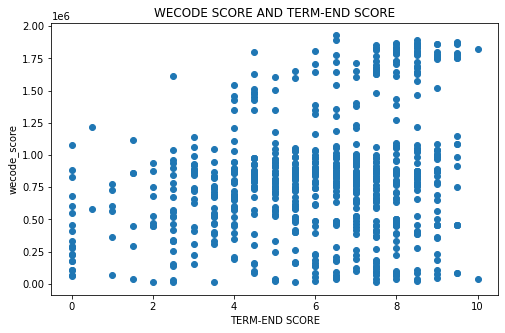

In [74]:
_, (ax1) = plt.subplots(1, 1, figsize = (8, 5))

ax1.scatter(y = data['WECODE_score'], x = data['CK'])
ax1.set_title("WECODE SCORE AND TERM-END SCORE")
ax1.set(ylabel='wecode_score', xlabel='TERM-END SCORE')

plt.show()

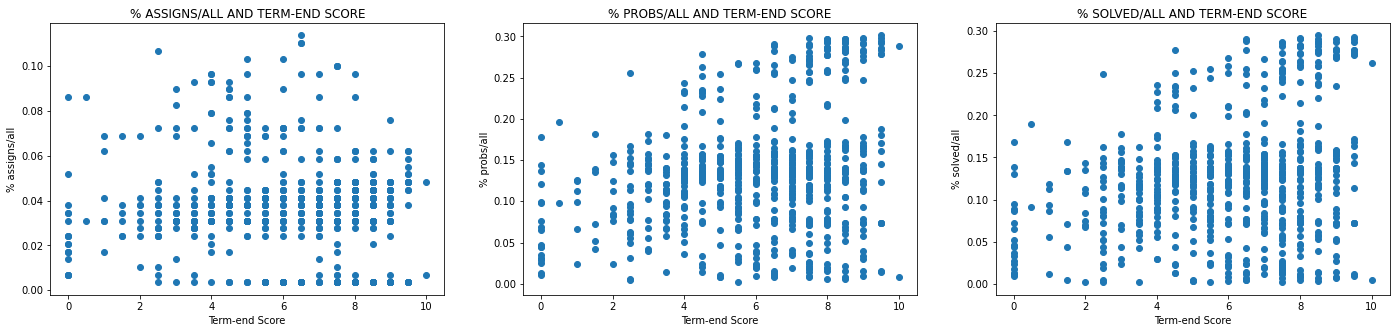

In [75]:
_, (ax2, ax3, ax4) = plt.subplots(1, 3, figsize = (24, 5))

ax2.scatter(y = data['% assigns/all'], x = data['CK'])
ax2.set_title("% ASSIGNS/ALL AND TERM-END SCORE")
ax2.set(ylabel='% assigns/all', xlabel='Term-end Score')

ax3.scatter(y = data['% probs/all'], x = data['CK'])
ax3.set_title("% PROBS/ALL AND TERM-END SCORE")
ax3.set(ylabel='% probs/all', xlabel='Term-end Score')

ax4.scatter(y = data['% solved/all'], x = data['CK'])
ax4.set_title("% SOLVED/ALL AND TERM-END SCORE")
ax4.set(ylabel='% solved/all', xlabel='Term-end Score')

plt.show()

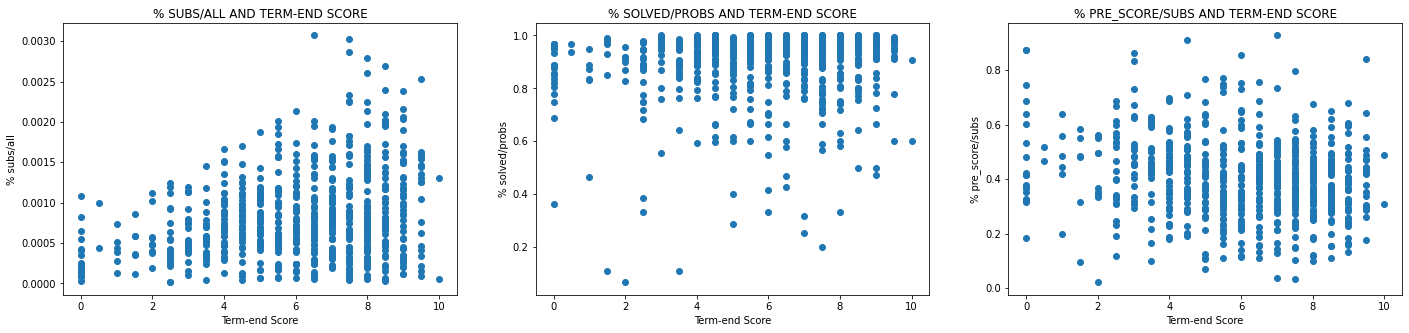

In [76]:
_, (ax5, ax6, ax7) = plt.subplots(1, 3, figsize = (24, 5))

ax5.scatter(y = data['% subs/all'], x = data['CK'])
ax5.set_title("% SUBS/ALL AND TERM-END SCORE")
ax5.set(ylabel='% subs/all', xlabel='Term-end Score')

ax6.scatter(y = data['% solved/probs'], x = data['CK'])
ax6.set_title("% SOLVED/PROBS AND TERM-END SCORE")
ax6.set(ylabel='% solved/probs', xlabel='Term-end Score')

ax7.scatter(y = data['% pre_score/subs'], x = data['CK'])
ax7.set_title("% PRE_SCORE/SUBS AND TERM-END SCORE")
ax7.set(ylabel='% pre_score/subs', xlabel='Term-end Score')

plt.show()

#**3. XÂY DỰNG MODEL TRAIN DỮ LIỆU VÀ DỰ ĐOÁN ĐIỂM CUỐI KÌ CÒN THIẾU**

In [77]:
from sklearn.linear_model import LinearRegression


In [78]:
col_train = ['assigns', 'probs', 'solved', 'subs', 'pre_score', 'WECODE_score', '% assigns/all', '% probs/all', '% solved/all', '% subs/all', '% solved/probs', '% pre_score/subs']

In [80]:
X_train = np.array(data_train[col_train])
y_train = np.array(data_train['CK'])

In [81]:
model = LinearRegression().fit(X_train, y_train)

In [85]:
y_predict = model.predict(X_train)

In [86]:
y_predict = y_predict*2.0
y_predict = y_predict.astype(int)
y_predict = np.round_(y_predict/2, decimals=1, out=None)


In [88]:
from sklearn.metrics import mean_squared_error

In [89]:
# Thử xem mean squared error
print("MSE:",mean_squared_error(y_train, y_predict))

MSE: 3.9164233576642338


In [94]:
y_predict = model.predict(np.array(data_predict[col_train]))
y_predict = y_predict*2.0
y_predict = y_predict.astype(int)
y_predict = np.round_(y_predict/2, decimals=1, out=None)


In [95]:
data_predict['CK'] = y_predict
data_predict

,user_id,assigns,probs,solved,subs,pre_score,WECODE_score,% assigns/all,% probs/all,% solved/all,% subs/all,% solved/probs,% pre_score/subs,CK
0,51,5,39,38.0,86,40.0,380000.0,0.017241,0.061514,0.059937,0.000325,0.974359,0.465116,5.5
1,240,15,123,126.0,623,133.0,1309761.0,0.051724,0.194006,0.198738,0.002354,1.024390,0.213483,8.5
2,391,14,111,102.0,379,104.0,1059240.0,0.048276,0.175079,0.160883,0.001432,0.918919,0.274406,6.5
3,513,15,135,130.0,672,135.0,1319307.0,0.051724,0.212934,0.205047,0.002540,0.962963,0.200893,7.0
4,586,15,124,123.0,296,127.0,1238947.0,0.051724,0.195584,0.194006,0.001119,0.991935,0.429054,6.0
5,705,14,114,118.0,328,122.0,1180000.0,0.048276,0.179811,0.186120,0.001240,1.035088,0.371951,7.0
6,772,13,91,112.0,292,115.0,1200552.0,0.044828,0.143533,0.176656,0.001104,1.230769,0.393836,11.0
7,774,14,99,98.0,197,101.0,988888.0,0.048276,0.156151,0.154574,0.000745,0.989899,0.512690,5.5
8,776,14,98,99.0,264,99.0,998888.0,0.048276,0.154574,0.156151,0.000998,1.010204,0.375000,6.5
9,792,15,102,158.0,422,180.0,1602776.0,0.051724,0.160883,0.249211,0.001595,1.549020,0.426540,14.0
